______________________________________________________________________________________________________
## `Introduction`

Every year the U.S. Social Security Administration releases a dataset of births and registered names. This dataset being open source is commonly used for training purposes within data science and statistics (https://www.kaggle.com/datasets/kaggle/us-baby-names). It has also brought to light several trends over the years due to the size and trainability of the data. 
As a simple example, thanks to this dataset we now know the names "Olivia" and "Liam" have been trending as the most popular US baby names for quite some time. The Social Security Administration provides an easily accessed website that allows the public to interact with trends and naming statistics over the last 100 years (https://www.ssa.gov/OACT/babynames/). 

Recently, it has been discovered that Latin American surnames have been increasing in the United States over the past several decades (https://www.nytimes.com/2016/12/15/us/census-data-hispanic-surnames.html). This coorelates with increase in the Latin population in the United States (https://www.npr.org/2021/09/15/1037358346/us-latino-population-demographic-figures-pew-center-hispanic-heritage-month).

While working with this dataset for course work, I came across another trend. 

In this short data analysis I will show a decrease in common Latin American first names in the US starting from the year 2000 and continuing today.



## `Methodology and Objective`
    Using a Netnographic approach my objective is to show a trend in baby naming, potentially related to immigration policy. Utilizing accessible data science tools and available datasets I will strive to illustrate the societal constrictions placed upon the American Latin community.   
______________________________________________________________________________________________________

In [1]:
#Required imports

from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from zipfile import ZipFile
import seaborn as sns
import warnings
import csv
import ast
import glob
import os

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff 
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose      
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima 
import statsmodels.api as sm

In [4]:
#collecting data from .zip and creating a dataframe

columns = [['year', 'name', 'gender', 'amount']]

with ZipFile('../babies.zip') as temp_zip:
    for file_name in temp_zip.namelist():
        if ".txt" in file_name:
            with temp_zip.open(file_name) as temp_file:
                for line in temp_file.read().decode("utf-8").splitlines():
                    line_chunks = line.split(",")
                    year = file_name[3:7] 
                    name = line_chunks[0]
                    gender = line_chunks[1]
                    amount = line_chunks[2]
                    columns.append([year, name, gender, amount])

In [5]:
#Creating a saved .csv
csv.writer(open("babies.csv", "w", newline="",
                encoding="utf-8")).writerows(columns)

In [3]:
#running .csv
babies = pd.read_csv("babies.csv", parse_dates=['year'])
#setting timeseries index
babies.index.freq = 'MS'
#sorting values by year
babies = babies.sort_values(by=['year'], ascending=False)
babies.head()

,year,name,gender,amount
1881450,2016-01-01,Schyler,M,6
1861918,2016-01-01,Ellenora,F,9
1861824,2016-01-01,Braylea,F,9
1861825,2016-01-01,Brayli,F,9
1861826,2016-01-01,Breelle,F,9


In [36]:
#As you can see this is a large dataset

print('Size of dataframe:', '\n', babies.shape)

Size of dataframe: 
 (1891894, 4)


<AxesSubplot:title={'center':'All births'}, xlabel='year'>

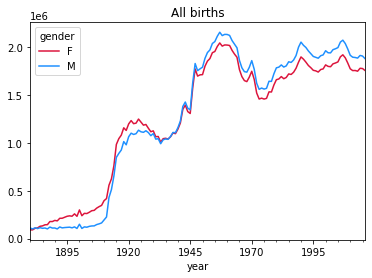

In [4]:
#Plot of total births by gender in order to get a global idea of the data

total = babies.pivot_table('amount', index='year', columns='gender', aggfunc=sum)
total.plot(title='All births', color=['crimson', 'dodgerblue'])

______________________________________________________________________________________________________
## `Popular American Names`:

Using this dataset it has been proven that since the 2005 release of the "Twilight" franchise of movies and books, the name "Bella" has been majorly on the rise as a popular US babyname. This helps to show the cultural effect on naming trends. 

If something like a movie or book could have such an effect on naming trends, could politics as well?

https://www.yahoo.com/lifestyle/tagged/health/parenting/biggest-baby-name-trend-moment-twilight-165000157.html
______________________________________________________________________________________________________

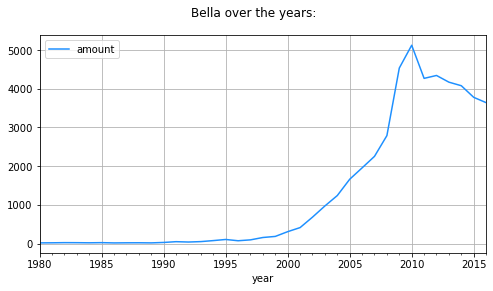

In [38]:
names = ['Bella', 'Aubrey', 'Hunter', 'Axel']

for name in names:
    bella = babies[babies['name'] == 'Bella']
    bella = pd.DataFrame(bella.groupby('year')['amount'].sum()).loc['1980-01-01':'2020-01-01']

bella.plot(figsize=(8, 4), subplots=True, color='dodgerblue', grid=True, title= 'Bella over the years: ');

______________________________________________________________________________________________________
Here a clear increase is seen in the name "Bella" peaking in 2010. With the book being released in 2005 and the movie in 2008 this is a clear illustration of the series cultural effect on society.

Continuing on, I have chosen a few names at random to observe their changes overtime as well as the some of the most popular us baby names.
______________________________________________________________________________________________________

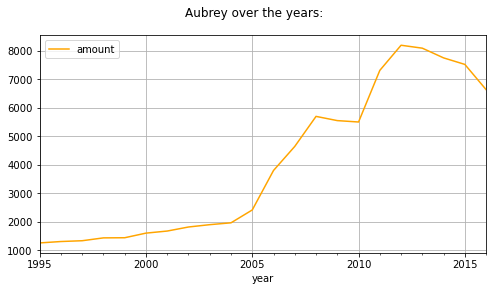

In [39]:
Aubrey = babies[babies['name'] == 'Aubrey']
Aubrey = pd.DataFrame(Aubrey.groupby('year')['amount'].sum()).loc['1995-01-01':'2020-01-01']
Aubrey.plot(figsize=(8, 4), subplots=True, color='orange', grid=True, title= 'Aubrey over the years: ');

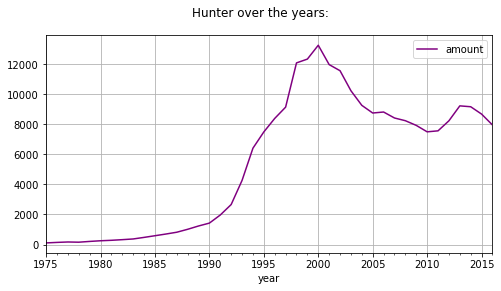

In [40]:
Hunter = babies[babies['name'] == 'Hunter']
Hunter = pd.DataFrame(Hunter.groupby('year')['amount'].sum()).loc['1975-01-01':'2020-01-01']
Hunter.plot(figsize=(8, 4), subplots=True, color='purple', grid=True, title= 'Hunter over the years: ');

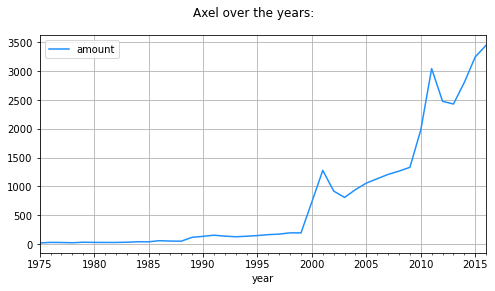

In [41]:
Axel = babies[babies['name'] == 'Axel']
Axel = pd.DataFrame(Axel.groupby('year')['amount'].sum()).loc['1975-01-01':'2020-01-01']
Axel.plot(figsize=(8, 4), subplots=True, color='dodgerblue', grid=True, title= 'Axel over the years: ');

______________________________________________________________________________________________________
## `Political Names`:

Politics and social climate can have a great effect on the choices parents may make for their children. In times of war or chaotic politics perhaps parents would want their children to be dissassociated with these problems as much as possible for safety. This could influence their choice of name for their newborn children. An example of such below:
______________________________________________________________________________________________________

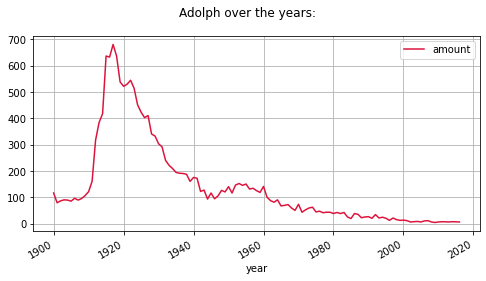

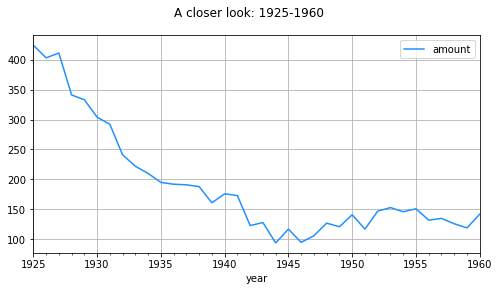

In [42]:
#Showing the decrease of the name "Adolph" post WW2, to show political effect

Adolph = babies[babies['name'] == 'Adolph']
Adolph = pd.DataFrame(Adolph.groupby('year')['amount'].sum()).loc['1900-01-01':'2020-01-01']
Adolph.plot(figsize=(8, 4), subplots=True, color='crimson', grid=True, title= 'Adolph over the years: ');

Adolph2 = babies[babies['name'] == 'Adolph']
Adolph2 = pd.DataFrame(Adolph2.groupby('year')['amount'].sum()).loc['1925-01-01':'1960-01-01']
Adolph2.plot(figsize=(8, 4), subplots=True, color='dodgerblue', grid=True, title= 'A closer look: 1925-1960');

______________________________________________________________________________________________________
Here a sharp downturn of popularity can be seen between 1925-1935 for the name "Adolph" in the United States, assumedly as a response to Adolph Hitler's rise to power in German politics at that time. The name reached it's all time low in 1944 as the United States was embroiled overseas in WW2. 

______________________________________________________________________________________________________
## `Common Latin/Hispanic names`: 

A new story emerges when we look to more commonly Latin American first names over time. Starting with the name Jose below, we see a sharp decrease of many common Mexican and Latin American names beginning in the early 2000's. Though it has been documented that surnames of Latin American names are increasing in the US (https://adnamerica.com/en/united-states/latino-surnames-rise-us). 
According to (https://usafacts.org/data/topics/people-society/population-and-demographics/our-changing-population):

    "Between 2010 and 2021, the share of the population that is Hispanic/Latino grew the most, increasing 2.5 percentage points to 18.9%. The white (non-Hispanic) population had the largest decrease dropping 4.5 percentage points to 59.3%."

______________________________________________________________________________________________________

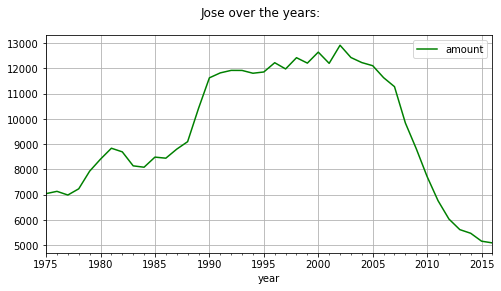

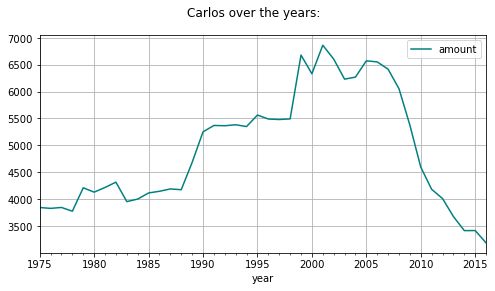

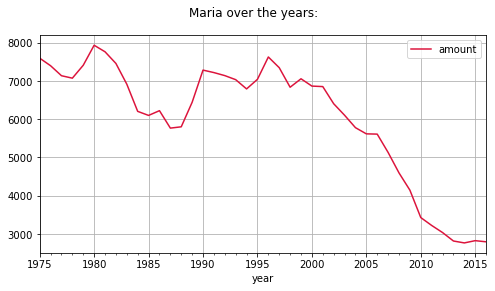

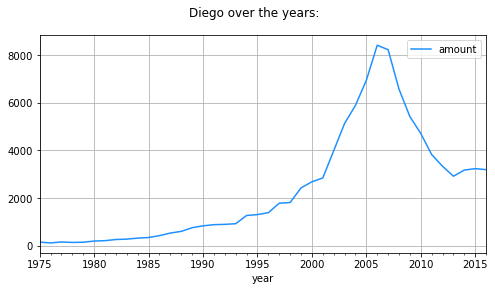

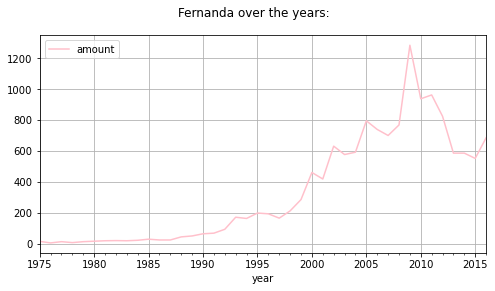

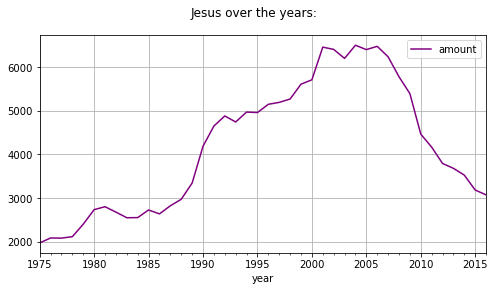

In [17]:
jose = babies[babies['name'] == 'Jose']
jose = pd.DataFrame(jose.groupby('year')['amount'].sum()).loc['1975-01-01':'2020-01-01']
jose.plot(figsize=(8, 4), subplots=True, color='green', grid=True, title= 'Jose over the years: ');

carlos = babies[babies['name'] == 'Carlos']
carlos = pd.DataFrame(carlos.groupby('year')['amount'].sum()).loc['1975-01-01':'2020-01-01']
carlos.plot(figsize=(8, 4), subplots=True, color='teal', grid=True, title= 'Carlos over the years: ');

Maria = babies[babies['name'] == 'Maria']
Maria = pd.DataFrame(Maria.groupby('year')['amount'].sum()).loc['1975-01-01':'2020-01-01']
Maria.plot(figsize=(8, 4), subplots=True, color='crimson', grid=True, title= 'Maria over the years: ');

diego = babies[babies['name'] == 'Diego']
diego = pd.DataFrame(diego.groupby('year')['amount'].sum()).loc['1975-01-01':'2020-01-01']
diego.plot(figsize=(8, 4), subplots=True, color='dodgerblue', grid=True, title= 'Diego over the years: ');

Fernanda = babies[babies['name'] == 'Fernanda']
Fernanda = pd.DataFrame(Fernanda.groupby('year')['amount'].sum()).loc['1975-01-01':'2020-01-01']
Fernanda.plot(figsize=(8, 4), subplots=True, color='pink', grid=True, title= 'Fernanda over the years: ');

Jesus = babies[babies['name'] == 'Jesus']
Jesus = pd.DataFrame(Jesus.groupby('year')['amount'].sum()).loc['1975-01-01':'2020-01-01']
Jesus.plot(figsize=(8, 4), subplots=True, color='purple', grid=True, title= 'Jesus over the years: ');

______________________________________________________________________________________________________
This increase representative population coorelates with the increase of Latin American surnames. Why would then Latin American first names decrease in popularity if surnames and population of this community are increasing?
Perhaps fear and discrimination, as some studies that have been conducted into discrimination towards the Latin American community and many public testimonies have suggested. 

Names can often be the first introduction to employment, housing and services. 

https://journals.sagepub.com/doi/full/10.1177/2378023117737193

https://www.huffpost.com/entry/jose-joe-job-discrimination_n_5753880
______________________________________________________________________________________________________

## Closer look at when the decline began...
______________________________________________________________________________________________________

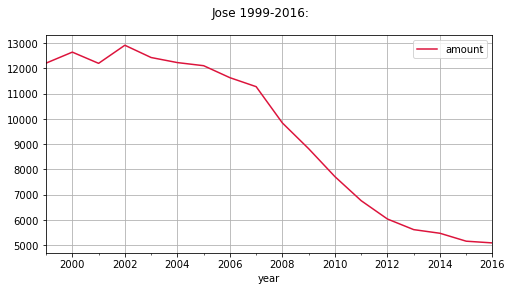

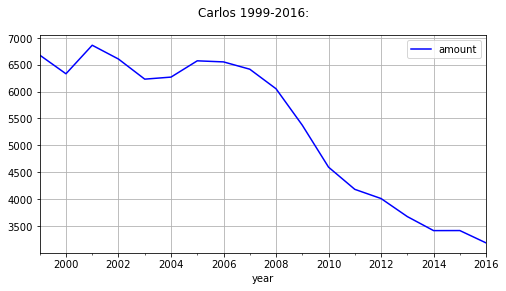

In [20]:
jose = babies[babies['name'] == 'Jose']
jose = pd.DataFrame(jose.groupby('year')['amount'].sum()).loc['1999-01-01':'2020-01-01']
jose.plot(figsize=(8, 4), subplots=True, color='crimson', grid=True, title= 'Jose 1999-2016: ');

Carlos = babies[babies['name'] == 'Carlos']
Carlos = pd.DataFrame(Carlos.groupby('year')['amount'].sum()).loc['1999-01-01':'2020-01-01']
Carlos.plot(figsize=(8, 4), subplots=True, color='blue', grid=True, title= 'Carlos 1999-2016: ');

______________________________________________________________________________________________________
Here it can be seen that the sharp decline begins in 2002 but really picks up after 2005. In most cases the usage of these common names has halved from the early 2000's and continues. Could this be in reaction to the 2001 passing of the Patriot Act that expanded homeland security allowances? 

https://mtsu.edu/first-amendment/article/1096/usa-patriot-act-of-2001
______________________________________________________________________________________________________

______________________________________________________________________________________________________
## Deportation statistics
______________________________________________________________________________________________________

In [22]:
#https://github.com/mwmott/data-deportations

deport = pd.read_csv("../deps.csv", parse_dates=['Year'])
deport.index.freq = 'MS'
deport.tail()

,Year,Removals,Returns
116,2008-01-01,359795,811263.0
117,2009-01-01,391932,582648.0
118,2010-01-01,383031,474275.0
119,2011-01-01,388409,322164.0
120,2012-01-01,419384,229968.0


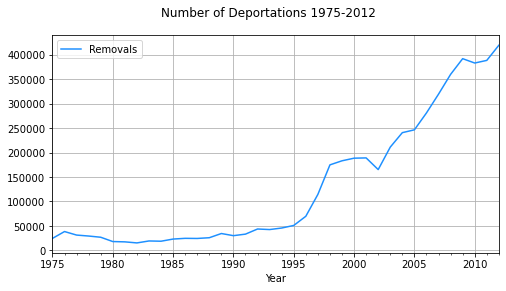

In [23]:
dates = pd.DataFrame(deport.groupby('Year')['Removals'].sum()).loc['1975-01-01':'2012-01-01']
dates.plot(figsize=(8, 4), subplots=True, color='dodgerblue', grid=True, title= 'Number of Deportations 1975-2012');

______________________________________________________________________________________________________
Here we see the total number of deportations in the United States between 1975 and 2012. We see an increase of deportations beginning around 1995 however it appeared to nearly be decling between 2000-2002.

When we zoom in, we see a stark increase of deportations begininning after 2002 as the significant policy changes post-911 were put into place.
______________________________________________________________________________________________________

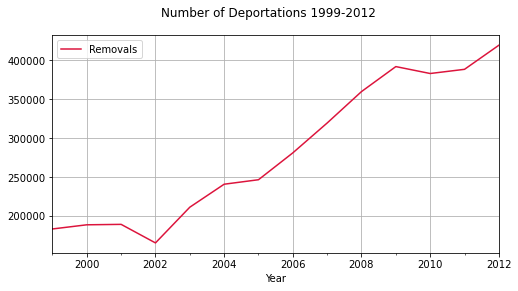

In [50]:
dates = pd.DataFrame(deport.groupby('Year')['Removals'].sum()).loc['1999-01-01':'2012-01-01']
dates.plot(figsize=(8, 4), subplots=True, color='crimson', grid=True, title= 'Number of Deportations 1999-2012');

## `What are we seeing?`
______________________________________________________________________________________________________
The sharp decline in hispanic names in 2002 occurs at the exact point of increase of deportations. Could the hispanic community be reducing their choice of more traditional names to protect their families? 

Are new parents of Latin American descent choosing not to name their children traditionally due to the political climate and fear? 
______________________________________________________________________________________________________

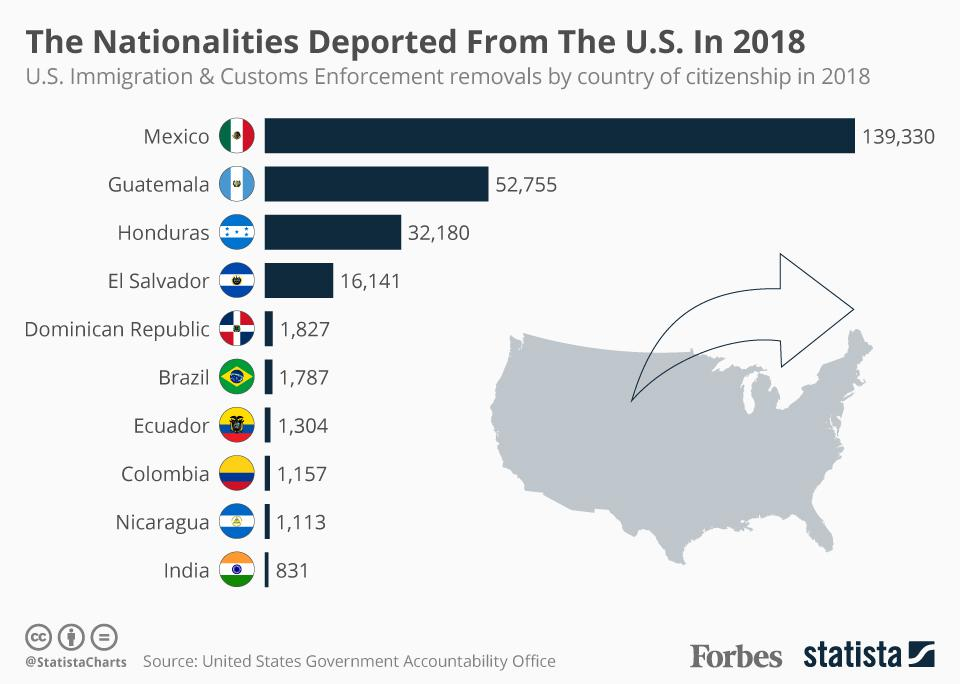

______________________________________________________________________________________________________
## `Arabic Names`:

As the Arab community is also targeted in the US I wanted to see if there was a similar effect within this community and common naming practices. However there does not appear to be as stark of a drop off. Keep in mind though the number of registered births under the following names is much less than the numbers of more traditionally Latin American names seen, though an interesting comparison. 
______________________________________________________________________________________________________

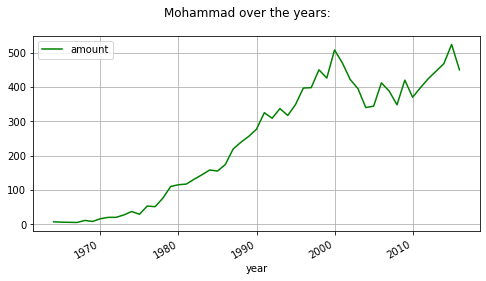

In [25]:
Mohammad = babies[babies['name'] == 'Mohammad']
Mohammad = pd.DataFrame(Mohammad.groupby('year')['amount'].sum()).loc['1960-01-01':'2020-01-01']
Mohammad.plot(figsize=(8, 4), subplots=True, color='green', grid=True, title= 'Mohammad over the years: ');

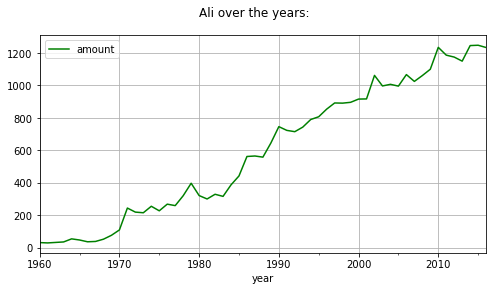

In [26]:
Ali = babies[babies['name'] == 'Ali']
Ali = pd.DataFrame(Ali.groupby('year')['amount'].sum()).loc['1960-01-01':'2020-01-01']
Ali.plot(figsize=(8, 4), subplots=True, color='green', grid=True, title= 'Ali over the years: ');

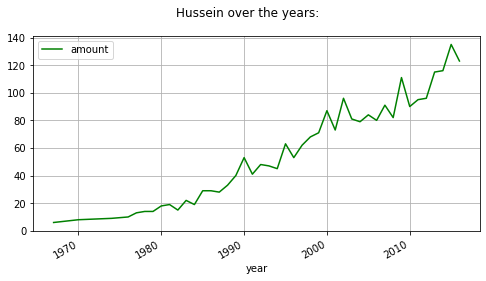

In [27]:
Hussein = babies[babies['name'] == 'Hussein']
Hussein = pd.DataFrame(Hussein.groupby('year')['amount'].sum()).loc['1960-01-01':'2020-01-01']
Hussein.plot(figsize=(8, 4), subplots=True, color='green', grid=True, title= 'Hussein over the years: ');

## `Conclusion`
______________________________________________________________________________________________________
With the reform of the Immigration and Nationality Act of 1965 the United States saw an increase of Arab immigrants as a result of wars and political disrest within multiple countries (https://en.wikipedia.org/wiki/Immigration_and_Nationality_Act_of_1965). 

What is interesting here, is the increase in comparison to the Latin American community. Though both communities are increasing in population within the country-traditional Latin American first names are on the decline, while traditionally Arabic names seem to be on a steady rise, which coorelates with the population (https://www.aaiusa.org/about-arab-americans). At a time when many Americans are reconnecting and revitalizing their cultures, are immigration policies having an effect on the naming practices of it's citizens? Some progress has been made with the current majority generation to bring back traditional practices (https://www.axios.com/2022/09/13/latino-hispanic-american-spanish-accents). In some cases perhaps parents chose to go with less religiously inclined names like "Jose" and "Maria" but a common name like Carlos, hypothetically shouldn't be effected as well if that were the case. 

Though I cannot claim direct coorelation I present the data as I've found it and believe a cultural effect to be taking place. I encourage others to get the dataset and find your own trends.
______________________________________________________________________________________________________